# Selenium을 통한 Webscraping

### Basics

In [1]:
from selenium import webdriver

In [2]:
# auto-reload 설정
%load_ext autoreload
%autoreload 2

In [3]:
# chromedriver 경로 확인
!dir .\chromedriver.exe

 Volume in drive C has no label.
 Volume Serial Number is 0270-2DB2

 Directory of C:\PycharmProjects\04_scraping\scraping

2021-06-29  �삤�썑 06:48        11,107,328 chromedriver.exe
               1 File(s)     11,107,328 bytes
               0 Dir(s)  116,302,581,760 bytes free


In [4]:
# webdriver가 직접 request를 보내는 역할을 한다
driver = webdriver.Chrome('./chromedriver.exe')        # 현재 디렉토리 밑에 있으면 경로 지정하지 않아도 알아서 찾음
driver

<selenium.webdriver.chrome.webdriver.WebDriver (session="b9d3d23bb71c10a60c00ac7775133c14")>

In [5]:
# 웹사이트 불러오기
d = driver.get('https://www.naver.com')                # 위 chromedriver 창이 열린 뒤에만 실행 가능함
type(d)

NoneType

(str,
 '<html lang="ko" data-dark="false" data-useragent="Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.114 Safari/537.36"><head> <meta charset="utf-8"> <title>NAVER</title> <meta http-equiv="X-UA-Compatible" content="IE=edge"> <meta name="viewport" content="width=1190"> <meta name="apple-mobile-web-app-title" content="NAVER"> <meta name="robots" content="index,nofollow"> <meta name="description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"> <meta property="og:title" content="네이버"> <meta property="og:url" content="https://www.naver.com/"> <meta property="og:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta property="og:description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"> <meta name="twitter:card" content="summary"> <meta name="twitter:title" content=""> <meta name="twitter:url" content="https://www.naver.com/"> <meta name="twitter:image" content="https://s.pstatic.net/static/www/m
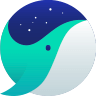
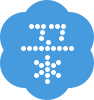

In [6]:
# 페이지 가져오기
pg = driver.page_source
type(pg), pg                        # html 내용을 str으로 가져온다

---
## Melon Chart Scraping
이하 모든 웹사이트는 교육 목적으로만 사용되었습니다. <br>
https://www.melon.com/chart/

In [7]:
browser = webdriver.Chrome()
browser.get('https://www.melon.com/chart/')

In [8]:
# 웹페이지를 str으로 가져온다
html_str = browser.page_source
html_str

'<html lang="ko" class="narrow-screen"><head>\n\t\t\n\t\n\t\n\t\n\t\n\t\n\t\n\t\n\n\t<meta http-equiv="Content-Type" content="text/html; charset=utf-8">\n\t<meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">\n\t\n\n\t\n\n\t\n\n\t<title>멜론차트&gt;24H&gt;멜론</title>\n\t<meta name="keywords" content="음악서비스, 멜론차트, 멜론TOP100, 최신음악, 인기가요, 뮤직비디오, 앨범, 플레이어, 스트리밍, 다운로드, 아티스트플러스, 아티스트채널">\n\t<meta name="description" content="국내 최다 4,000만곡 보유, No.1 뮤직플랫폼 멜론! 최신 트렌드부터 나를 아는 똑똑한 음악추천까지!">\n\t<meta name="naver-site-verification" content="e2b43191afa0f1d2deb8e2cda8f45ee1408c44a1">\n\t<meta property="fb:app_id" content="357952407588971">\n\t<meta property="og:title" content="Melon">\n\t<meta property="og:image" content="https://cdnimg.melon.co.kr/resource/image/web/common/logo_melon142x99.png">\n\t<meta property="og:description" content="음악이 필요한 순간, 멜론">\n\t<meta property="og:url" content="http://www.melon.com/chart/">\n\t<meta property="og:type" content="website">\n\t<meta name="viewport" cont

#### 불러온 내용은 BeautifulSoup으로 분석

In [9]:
from bs4 import BeautifulSoup as BS

In [10]:
soup = BS(html_str, 'html.parser')
soup

<html class="narrow-screen" lang="ko"><head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
<title>멜론차트&gt;24H&gt;멜론</title>
<meta content="음악서비스, 멜론차트, 멜론TOP100, 최신음악, 인기가요, 뮤직비디오, 앨범, 플레이어, 스트리밍, 다운로드, 아티스트플러스, 아티스트채널" name="keywords"/>
<meta content="국내 최다 4,000만곡 보유, No.1 뮤직플랫폼 멜론! 최신 트렌드부터 나를 아는 똑똑한 음악추천까지!" name="description"/>
<meta content="e2b43191afa0f1d2deb8e2cda8f45ee1408c44a1" name="naver-site-verification"/>
<meta content="357952407588971" property="fb:app_id"/>
<meta content="Melon" property="og:title"/>
<meta content="https://cdnimg.melon.co.kr/resource/image/web/common/logo_melon142x99.png" property="og:image"/>
<meta content="음악이 필요한 순간, 멜론" property="og:description"/>
<meta content="http://www.melon.com/chart/" property="og:url"/>
<meta content="website" property="og:type"/>
<meta content="width=device-width" name="viewport"/>
<link href="/favicon.ico?2" id="favicon" rel="shortcut i

In [11]:
# 곡 제목, 가수 이름 select
tags = soup.select('tr[data-song-no]')
type(tags), len(tags), tags                # 곡 제목 div tag, 가수 이름 div tag,... 순으로 출력

(bs4.element.ResultSet,
 100,
 [<tr data-song-no="33625988">
  <td><div class="wrap t_right"><input class="input_check" name="input_check" title="바라만 본다 곡 선택" type="checkbox" value="33625988"/></div></td>
  <td><div class="wrap">
  <a class="image_typeAll" href="javascript:melon.link.goAlbumDetail('10638275');" title="MSG워너비 1집">
  <img alt="MSG워너비 1집 - 페이지 이동" height="60" onerror="WEBPOCIMG.defaultAlbumImg(this);" src="https://cdnimg.melon.co.kr/cm2/album/images/106/38/275/10638275_20210625172521_500.jpg/melon/resize/120/quality/80/optimize" width="60"/>
  <span class="bg_album_frame"></span>
  </a>
  </div></td>
  <td><div class="wrap">
  <a class="btn button_icons type03 song_info" href="javascript:melon.link.goSongDetail('33625988');" title="바라만 본다 곡정보"><span class="none">곡정보</span></a>
  </div></td>
  <td><div class="wrap">
  <div class="wrap_song_info">
  <div class="ellipsis rank01"><span>
  <a href="javascript:melon.play.playSong('19030101',33625988);" title="바라만 본다 재생">바라만 본다<

In [12]:
# ResultSet의 for loop
ranks = []

for tag in tags:
    title = tag.select('.rank01')[0].text.strip()
    artist = tag.select('.rank02 > a')[0].text.strip()
    rank = [title, artist]
    ranks.append(rank)
ranks

[['바라만 본다', 'MSG워너비(M.O.M)'],
 ['나를 아는 사람', 'MSG워너비(정상동기)'],
 ['Next Level', 'aespa'],
 ['Butter', '방탄소년단'],
 ['헤픈 우연', '헤이즈 (Heize)'],
 ['치맛바람 (Chi Mat Ba Ram)', '브레이브걸스'],
 ['Dun Dun Dance', '오마이걸 (OH MY GIRL)'],
 ['Peaches (Feat. Daniel Caesar & Giveon)', 'Justin Bieber'],
 ["롤린 (Rollin')", '브레이브걸스'],
 ['Alcohol-Free', 'TWICE (트와이스)'],
 ['ASAP', 'STAYC(스테이씨)'],
 ['라일락', '아이유'],
 ['운전만해 (We Ride)', '브레이브걸스'],
 ['Dynamite', '방탄소년단'],
 ['안녕 (Hello)', '조이 (JOY)'],
 ['Celebrity', '아이유'],
 ['상상더하기', 'MSG워너비 TOP 8 (별루지, 김정수, 강창모, 정기석, 이동휘, 이상이, 박재정, 원슈타인)'],
 ['신호등', '이무진'],
 ['비와 당신', '이무진'],
 ['사이렌 Remix (Feat. UNEDUCATED KID, Paul Blanco)', '호미들'],
 ['Timeless', 'SG 워너비'],
 ['상상더하기', '라붐 (LABOUM)'],
 ['내 손을 잡아', '아이유'],
 ['멜로디', 'ASH ISLAND'],
 ['밝게 빛나는 별이 되어 비춰줄게', '송이한'],
 ['마.피.아. In the morning', 'ITZY (있지)'],
 ['라라라', 'SG 워너비'],
 ['밤하늘의 별을(2020)', '경서'],
 ['LOVE DAY (2021) (바른연애 길잡이 X 양요섭, 정은지)', '양요섭'],
 ['Savage Love (Laxed - Siren Beat) (BTS Remix)', 'Jawsh 685'],
 ['하루만 더', '빅마

#### Dataframe으로 만들기

In [13]:
import pandas as pd

In [14]:
pd.DataFrame(ranks, columns=['제목', '가수'], index=range(1, 101)).head()

,제목,가수
1,바라만 본다,MSG워너비(M.O.M)
2,나를 아는 사람,MSG워너비(정상동기)
3,Next Level,aespa
4,Butter,방탄소년단
5,헤픈 우연,헤이즈 (Heize)


---
## Genie Chart Scraping
https://www.genie.co.kr/chart/top200

In [15]:
browser = webdriver.Chrome()
browser.get('https://www.genie.co.kr/chart/top200')

In [16]:
# html str 가져오기
html = browser.page_source

In [17]:
soup = BS(html, 'html.parser')
soup

<html class="js flexbox canvas canvastext webgl no-touch geolocation postmessage websqldatabase indexeddb hashchange history draganddrop websockets rgba hsla multiplebgs backgroundsize borderimage borderradius boxshadow textshadow opacity cssanimations csscolumns cssgradients cssreflections csstransforms csstransforms3d csstransitions fontface generatedcontent video audio localstorage sessionstorage webworkers no-applicationcache svg inlinesvg smil svgclippaths" dir="ltr" lang="ko" style=""><head>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<!--[if lte IE 6]><html dir="ltr" class="no-js ie6"><![endif]-->
<!--[if lte IE 7]><html dir="ltr" class="no-js ie7"><![endif]-->
<!--[if IE 8]><html dir="ltr" class="no-js ie8"><![endif]-->
<!--[if IE 9]><html dir="ltr" class="no-js ie9"><![endif]-->
<!--[if (gte IE 10)|!(IE)]><!--><!--<![endif]-->
<title>지니차트&gt;실시간 - 지니</title>
<meta charset="utf-8"/>
<meta content="d17289f97c7f294985a9b0eb3649a45ac5ceeee2" name="naver-site-verificatio

In [18]:
# 1~50위 차트
tags = soup.select('td.info')
type(tags), len(tags), tags[0]            # 태그 안에 태그가 또 있고 그 다음에 text가 들어있는 구조

(bs4.element.ResultSet,
 50,
 <td class="info">
 <a class="title ellipsis" href="#" onclick="fnPlaySong('93619160','1');return false;" title="재생">
                                         
                                             
                                         
                                         
                                         
                                         
                                             
                                                 바라만 본다</a>
 <a class="artist ellipsis" href="#" onclick="fnViewArtist('81123111');return false;">MSG워너비 (M.O.M)</a>
 <div class="toggle-button-box">
 <button class="btn artist-etc" onclick="fnRelationArtistList('93619160');" type="button">외</button>
 <ul class="list" id="RelationArtist_93619160"></ul>
 </div>
 <i class="bar">|</i>
 <a class="albumtitle ellipsis" href="#" onclick="fnViewAlbumLayer('82110804');return false;">MSG워너비 1집</a>
 </td>)

In [19]:
# 태그 안에 글자가 여러개 -> strip 하더라도 중간에 낀 space는 제거할 수 없음
tags[0].text.strip()

'바라만 본다\nMSG워너비 (M.O.M)\n\n외\n\n\n|\nMSG워너비 1집'

In [20]:
tags[0].text.strip().replace('\n', '')       # 공백 제거 가능하지만 번거로움

'바라만 본다MSG워너비 (M.O.M)외|MSG워너비 1집'

**해결방안**: 원하는 각 텍스트를 태그로 특정할 수 있을 때까지 **select() 반복**

In [21]:
# 곡명 가져오기
title = tags[0].select('a.title')           # 하나 가져오더라도 ResultSet
title[0].text.strip()                       # \n 없에는 strip()이 중요!!

'바라만 본다'

In [22]:
# 가수 이름 가져오기
artist = tags[0].select('a.artist')
artist[0].text.strip()

'MSG워너비 (M.O.M)'

In [23]:
# 전체 tags에 대한 for loop
ranks = []

for tag in tags:
    title = tag.select('a.title')[0].text.strip()
    artist = tag.select('a.artist')[0].text.strip()
    rank = [title, artist]
    ranks.append(rank)
ranks

[['바라만 본다', 'MSG워너비 (M.O.M)'],
 ['나를 아는 사람', 'MSG워너비 (정상동기)'],
 ['치맛바람 (Chi Mat Ba Ram)', '브레이브걸스 (Brave girls)'],
 ['Next Level', 'aespa'],
 ['Butter', '방탄소년단'],
 ['Hello Future', 'NCT DREAM'],
 ['비와 당신', '이무진'],
 ['헤픈 우연', '헤이즈 (Heize)'],
 ['Alcohol-Free', 'TWICE (트와이스)'],
 ['신호등', '이무진'],
 ['Dun Dun Dance', '오마이걸 (OH MY GIRL)'],
 ['하루만 더', '빅마마 (Big Mama)'],
 ["롤린 (Rollin')", '브레이브걸스 (Brave girls)'],
 ['추적이는 여름 비가 되어', '장범준'],
 ['Peaches (Feat. Daniel Caesar & Giveon)', 'Justin Bieber'],
 ['라일락', '아이유 (IU)'],
 ['안녕 (Hello)', '조이 (JOY)'],
 ['해야 해', '2PM'],
 ['Dynamite', '방탄소년단'],
 ['Celebrity', '아이유 (IU)'],
 ['가을 우체국 앞에서', '김대명'],
 ['운전만해 (We Ride)', '브레이브걸스 (Brave girls)'],
 ['ASAP', 'STAYC (스테이씨)'],
 ['상상더하기', 'MSG워너비'],
 ['Timeless', 'SG워너비'],
 ['Ready to love', '세븐틴 (SEVENTEEN)'],
 ['오르골 (Life Is Still Going On)', 'NCT DREAM'],
 ['상상더하기', '라붐 (LABOUM)'],
 ['맛 (Hot Sauce)', 'NCT DREAM'],
 ['작은 것들을 위한 시 (Boy With Luv) (Feat. Halsey)', '방탄소년단'],
 ['사이렌 Remix (Feat. UNEDUCATED KID & 

#### Dataframe으로 만들기

In [24]:
import pandas as pd

In [25]:
genie = pd.DataFrame(ranks, columns=['Title', 'Artist'], index=range(1, 51))    # index: 순위
genie.head()

,Title,Artist
1,바라만 본다,MSG워너비 (M.O.M)
2,나를 아는 사람,MSG워너비 (정상동기)
3,치맛바람 (Chi Mat Ba Ram),브레이브걸스 (Brave girls)
4,Next Level,aespa
5,Butter,방탄소년단


#### Excel 파일로 저장하기

In [26]:
genie.to_excel('./files/genie.xlsx', header=True, index=True) 
print('파일이 저장되었습니다----------------------------------')

파일이 저장되었습니다----------------------------------


#### 저장한 excel 파일을 불러오기

In [27]:
g = pd.read_excel('./files/genie.xlsx', header=0, index_col=0)
g.head()

,Title,Artist
1,바라만 본다,MSG워너비 (M.O.M)
2,나를 아는 사람,MSG워너비 (정상동기)
3,치맛바람 (Chi Mat Ba Ram),브레이브걸스 (Brave girls)
4,Next Level,aespa
5,Butter,방탄소년단
